Importing the Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Thu thập dữ liệu

In [51]:

gold_data = pd.read_csv('dataset1.csv')

In [52]:

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,10/24/2022,3997.34,66.60,74.21,17.86,1.00
1,10/25/2022,3997.34,66.95,74.06,18.06,1.00
2,10/26/2022,3991.05,66.40,74.68,18.09,1.01
3,10/27/2022,4012.32,66.50,76.83,17.36,0.99
4,10/28/2022,3970.04,66.50,78.04,16.92,1.00


In [53]:

gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
137,3/10/2023,3986.37,66.20,67.85,18.45,1.05
138,3/11/2023,3992.01,66.65,67.10,18.40,1.06
139,3/12/2023,3918.32,66.40,66.24,18.44,1.06
140,3/13/2023,3861.59,66.53,67.14,18.86,1.07
141,3/14/2023,3855.76,66.70,65.25,20.00,1.07


In [54]:

gold_data.shape

(142, 6)

In [55]:

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     142 non-null    object 
 1   SPX      142 non-null    float64
 2   GLD      142 non-null    float64
 3   USO      142 non-null    float64
 4   SLV      142 non-null    float64
 5   EUR/USD  142 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.8+ KB


In [56]:

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [57]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,142.000000,142.000000,142.000000,142.000000,142.000000
mean,3950.288521,66.721338,69.526549,19.556620,1.034577
std,104.330080,0.361285,3.287037,1.676276,0.038714
min,3698.150000,66.200000,62.710000,16.810000,0.960000
25%,3861.590000,66.500000,67.157500,17.990000,1.000000
50%,3969.825000,66.650000,69.500000,19.360000,1.050000
75%,4012.320000,66.900000,71.522500,21.277500,1.070000
max,4179.760000,68.100000,78.690000,22.330000,1.100000


Correlation:
1. Positive Correlation
2. Negative Correlation

In [58]:
correlation = gold_data.corr()

<AxesSubplot:>

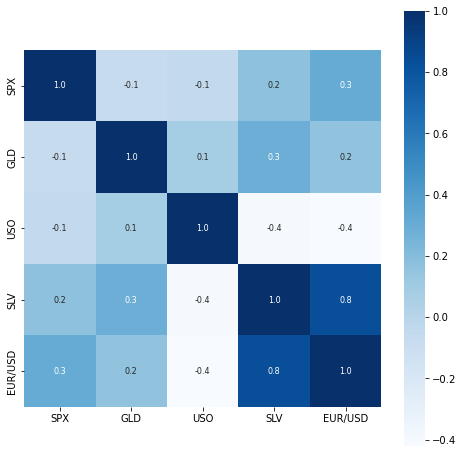

In [59]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [60]:
# correlation values of GLD
print(correlation['GLD'])

SPX       -0.068609
GLD        1.000000
USO        0.083032
SLV        0.287994
EUR/USD    0.160147
Name: GLD, dtype: float64


c:\Users\HP ZBOOK 15 G3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

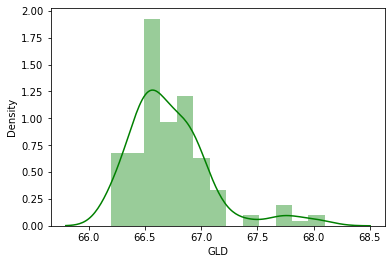

In [61]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [62]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [63]:
print(X)

         SPX    USO    SLV  EUR/USD
0    3997.34  74.21  17.86     1.00
1    3997.34  74.06  18.06     1.00
2    3991.05  74.68  18.09     1.01
3    4012.32  76.83  17.36     0.99
4    3970.04  78.04  16.92     1.00
..       ...    ...    ...      ...
137  3986.37  67.85  18.45     1.05
138  3992.01  67.10  18.40     1.06
139  3918.32  66.24  18.44     1.06
140  3861.59  67.14  18.86     1.07
141  3855.76  65.25  20.00     1.07

[142 rows x 4 columns]


In [64]:
print(Y)

0      66.60
1      66.95
2      66.40
3      66.50
4      66.50
       ...  
137    66.20
138    66.65
139    66.40
140    66.53
141    66.70
Name: GLD, Length: 142, dtype: float64


Splitting into Training data and Test Data

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [66]:
regressor = RandomForestRegressor(n_estimators=100)

In [67]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [68]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [69]:
print(test_data_prediction)

[66.4378 66.7525 66.948  66.7645 66.5985 66.5118 66.6345 66.975  66.7015
 66.607  66.8075 66.5245 66.948  66.4233 66.948  67.195  66.74   66.6685
 67.397  66.921  66.7995 66.7715 66.5375 66.585  66.7015 66.521  66.304
 66.761  66.476 ]


In [70]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.4418017111457422


Compare the Actual Values and Predicted Values in a Plot

In [71]:
Y_test = list(Y_test)

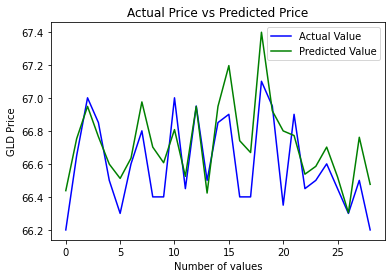

In [72]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()